## Regression & Classification, Flora Li

## Goal

1. Fit a linear regression and logistic regression model (with intercept & without intercept) on our fake data.
2. Manually find the optimal coefficients by calculating the nomal equation of linear regression, and utilizing gradient ascent/descent for logistic regression model.
3. Calculate metrices to measure performance (accuracy, precision, recall).

# Linear Regression

## Data Preparation

We use sklearn to generate some fake data.

In [2]:
import numpy as np
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(
    n_samples = 5,
    n_features =1,
    n_informative =1,
    bias =10,
    noise =10,
    random_state =0)

In [4]:
X, y

(array([[ 0.97873798],
        [ 2.2408932 ],
        [ 1.76405235],
        [ 1.86755799],
        [ 0.40015721]]),
 array([  47.7695571 ,  133.51062836,   77.41989586,  102.53006841,
          40.17155299]))

In [5]:
print (X.shape, y.shape)  #We notice that X is a 5*1 matrix and y is a vector

((5L, 1L), (5L,))


In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

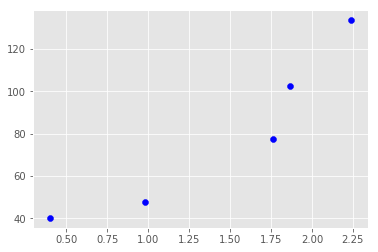

In [7]:
plt.scatter(X, y, color = 'blue')

## Hypothesis

In order to do machine learning, we propose a relationship (pattern) between the input and output values. Lets say that this the function

$y=f(x)$

this is known as the target function.

In [8]:
def hypothesis_linreg(X, coeffs):
    return np.dot(X, coeffs).flatten()  #matrix multiplication, use flatten to change from matrix to vector

## Cost function

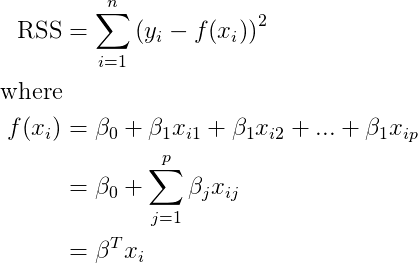

In [9]:
def cost_linreg(X, y, coeffs):
    y_pred = hypothesis_linreg(X, coeffs)  #generate y_pred using coeffs - linear regression model
    return np.sum((y - y_pred)**2)  #residual sum of square

## Optimization 

### Situation without intercept

#### 1.Guess a coefficient

In [10]:
coeffs = y.mean() / X.mean()
coeffs

55.355072557778215

In [11]:
# Calculate the prediction
y_pred = hypothesis_linreg(X, coeffs)
y_pred_only_mean = y_pred  #prediction without intercept

In [12]:
RSS_only_mean = cost_linreg(X, y, coeffs)   #RSS without intercept

print "X: ", X
print "y: ", y
print "y_pred: ", y_pred_only_mean
print "RSS: ", RSS_only_mean

X:  [[ 0.97873798]
 [ 2.2408932 ]
 [ 1.76405235]
 [ 1.86755799]
 [ 0.40015721]]
y:  [  47.7695571   133.51062836   77.41989586  102.53006841   40.17155299]
y_pred:  [  54.17811213  124.04480564   97.64924561  103.37880805   22.1507313 ]
RSS:  865.368341584


In [13]:
def plot_regression_1d_data(X, y, y_pred, ax):
    """Add a scatter plot of data to an axis.
    
    Parameters
    ----------
    X: ndarray, shape (n_samples, )
    y: ndarray, shape (n_samples, )
    ax: matplotlib axis object
    """
    ax.scatter(X, y, color="blue")
    ax.plot(X, y_pred, color="red")
    ax.set_xlabel("$X$")
    ax.set_ylabel("$y$")

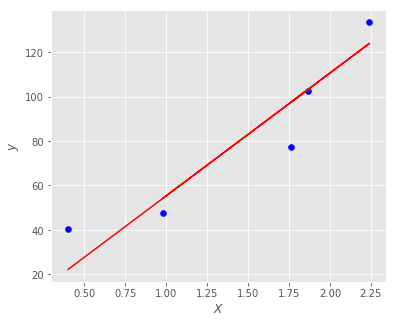

In [14]:
fig, ax = plt.subplots(1, figsize = (6,5))  #matplotlib
plot_regression_1d_data(X, y, y_pred_only_mean, ax)

#### 2.Closed form solution of linear regression to find optimal coefficient

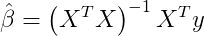

In [15]:
# Use normal equation to solve for coefficients 
coeffs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
coeffs

array([ 54.16819984])

In [16]:
# Calculate the prediction
y_pred = hypothesis_linreg(X, coeffs)
y_pred_ls = y_pred

In [17]:
RSS_ls = cost_linreg(X, y, coeffs)

print "X: ", X
print "y: ", y
print "y_pred: ", y_pred_ls
print "RSS: ", RSS_ls

X:  [[ 0.97873798]
 [ 2.2408932 ]
 [ 1.76405235]
 [ 1.86755799]
 [ 0.40015721]]
y:  [  47.7695571   133.51062836   77.41989586  102.53006841   40.17155299]
y_pred:  [  53.01647471  121.38515063   95.55554     101.16225442   21.67579563]
RSS:  847.422898317


We can see that the least square RSS is better than the RSS from guess coefficient.

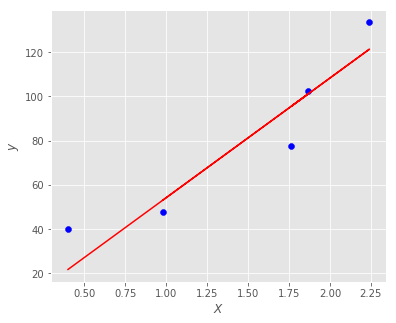

In [18]:
fig, ax = plt.subplots(1, figsize=(6, 5))

plot_regression_1d_data(X, y, y_pred_ls, ax)

### Situation fit the intercept/bias

In [19]:
np.ones((X.shape[0],1))  #this is used to add a 1 column in X matrix

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [20]:
def add_intercept(X):
    return np.hstack((np.ones((X.shape[0],1)),X))

In [21]:
print X
print add_intercept(X)

[[ 0.97873798]
 [ 2.2408932 ]
 [ 1.76405235]
 [ 1.86755799]
 [ 0.40015721]]
[[ 1.          0.97873798]
 [ 1.          2.2408932 ]
 [ 1.          1.76405235]
 [ 1.          1.86755799]
 [ 1.          0.40015721]]


In [22]:
X_ = add_intercept(X)

In [23]:
# Use normal equation to solve for coefficients 
coeffs_ = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
coeffs_

array([  9.86530739,  48.55272465])

In [24]:
# Calculate the prediction
y_pred = hypothesis_linreg(X_, coeffs_)
y_pred_ls_intercept = y_pred

In [25]:
RSS_ls_intercept = cost_linreg(X_, y, coeffs_)

print "X: ", X_
print "y: ", y
print "y_pred: ", y_pred_ls_intercept
print "RSS: ", RSS_ls_intercept

X:  [[ 1.          0.97873798]
 [ 1.          2.2408932 ]
 [ 1.          1.76405235]
 [ 1.          1.86755799]
 [ 1.          0.40015721]]
y:  [  47.7695571   133.51062836   77.41989586  102.53006841   40.17155299]
y_pred:  [  57.38570324  118.66677786   95.51485522  100.54033626   29.29403015]
RSS:  762.517255292


We can see that RSS of prediction with intercept is lower than that without intercept.

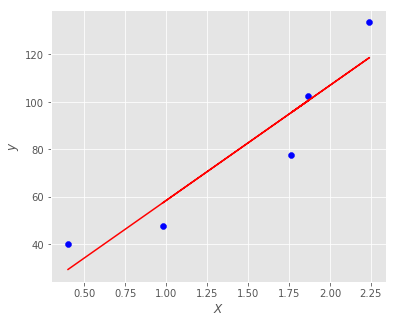

In [26]:
fig, ax = plt.subplots(1, figsize=(6, 5))

plot_regression_1d_data(X, y, y_pred_ls_intercept, ax)

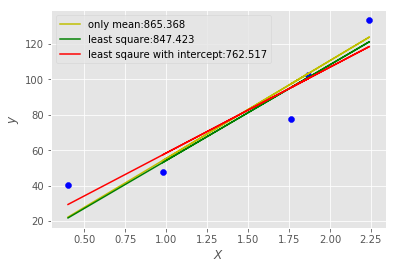

In [27]:
# plot 3 lines
fig, ax = plt.subplots(1, figsize = (6,4))
ax.scatter(X, y, c="blue")
ax.plot(X, y_pred_only_mean, c="y",
       label = "only mean:{0:.3f}".format(RSS_only_mean))
ax.plot(X, y_pred_ls, c="g",
       label = "least square:{0:.3f}".format(RSS_ls))
ax.plot(X, y_pred_ls_intercept, c="r",
       label = "least sqaure with intercept:{0:.3f}".format(RSS_ls_intercept))
ax.set_xlabel("$X$")
ax.set_ylabel("$y$")
plt.legend()
plt.show()

# Classification

### Data Preparation

Generate a dataset using sklearn's make_classification module. We use two features so that we can visualize our data.

In [28]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=0)

### Visualize the data

In [29]:
def plot_classification_data(X, y, ax):
    colors = np.array(["red","blue"])[y]
    ax.scatter(X[:,0], X[:,1], color = colors)
    ax.set_xlabel("$X_0$")
    ax.set_ylabel("$X_1$")

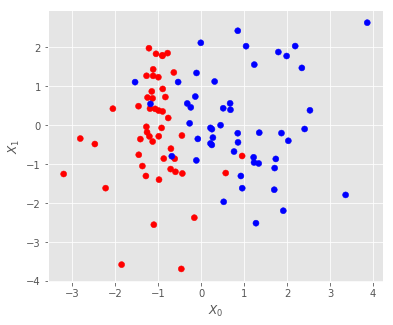

In [30]:
fig, ax =plt.subplots(1, figsize = (6,5))
plot_classification_data(X, y, ax)

Because there is overlap between red and blue dots, we cannot reach 100% classification fit.

### Eye-balling the decision boundary

First, we eye-ball the decision boundary goes through (0,0) and (-1,1.5), and draw a line across these
two points

In [31]:
def compute_scatterplot_bounds(X):
    """Compute the axis bounds for a scatterplot from a two column matrix of data.
    
    Parameters
    ----------
    X: ndarray, shape (n_samples, 2)
    """
    x0_bounds = (X[:, 0].min(), X[:, 0].max())
    x1_bounds = (X[:, 1].min(), X[:, 1].max())
    return x0_bounds, x1_bounds

def set_scatterplot_bounds(x0_bounds, x1_bounds, ax):
    """Set the axis bounds on a matplotlib axis.
    
    Parameters
    ----------
    x0_bounds: tuple with two elements.  The bounds on the first axis.
    x1_bounds: tuple with two elements.  The bounds on the second axis.
    ax: matplotlib axis object
    """
    ax.set_xlim(x0_bounds)
    ax.set_ylim(x1_bounds)

In [32]:
def plot_eyeballed_line_no_intercept(X, ax):
    """Add the zero intercept line we eyeballed above to the scatterplot."""
    x0_bounds, x1_bounds = compute_scatterplot_bounds(X)
    t = np.linspace(x0_bounds[0], x0_bounds[1], num=3)
    ax.plot(t, -1.5*t, linestyle='--', label="Eyeballed Line")
    set_scatterplot_bounds(x0_bounds, x1_bounds, ax)

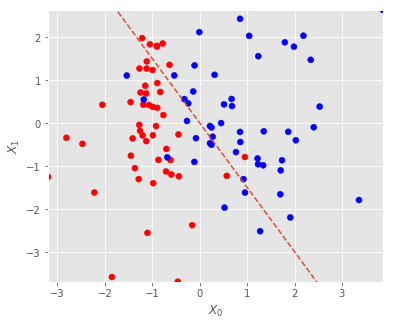

In [33]:
fig, ax = plt.subplots(1, figsize=(6, 5))

plot_classification_data(X, y, ax)
plot_eyeballed_line_no_intercept(X, ax)

Then, we eye balls a decision boundary with an intercept goes through the points (1, -4) and (-1, 2).

In [34]:
def plot_eyeballed_line(X, ax):
    """Add the line we eyeballed above to the scatterplot."""
    x0_bounds, x1_bounds = compute_scatterplot_bounds(X)
    t = np.linspace(x0_bounds[0], x0_bounds[1], num=3)
    ax.plot(t, -3*t - 1, linestyle='--', label="Eyeballed Line")
    set_scatterplot_bounds(x0_bounds, x1_bounds, ax)

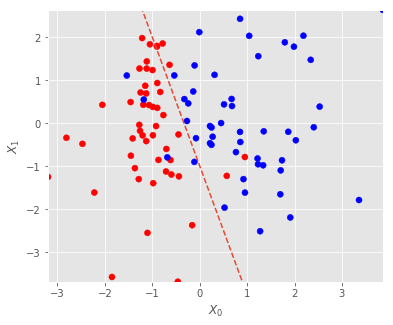

In [35]:
fig, ax = plt.subplots(1, figsize=(6, 5))

plot_classification_data(X, y, ax)
plot_eyeballed_line(X, ax)

## Logistic Regression

Now, we use logistic regression to fit a decision boundary.

With Logistic Regression we will be maximizing the likelihood function, instead of minimizing a cost
function.

### Hypothesis function

First recall the sigmoid function.

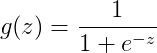

Here's our hypothesis function. This gives us a value from 0 to 1, which is our predicted probability that the datapoint belongs to the positive class.

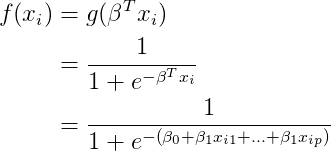

In [36]:
def predict_proba(X, coeffs):
    z = np.dot(X, coeffs).flatten()                  #don't forget flatten matrix to vector
    return 1/(1+np.exp(-z))

If predicted probability > thres, we classify the points as blue; if predicted probability < thres, we classfiy the points
as red.

In [37]:
def predict(X, coeffs, thres=0.5):
    g = predict_proba(X, coeffs)
    return (g > thres).astype(int)   #We don't want to get Ture/False, so change the type to integer.

### Likelihood

First we calculate the probability that a given data point is predicted correctly.

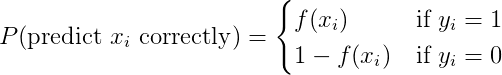

Then, we can rewrite the above function as follows.

We are going to calculate the likelihood that we predict all the datapoints correctly.This is calculated by taking the product of all the individual likelihood as follows.

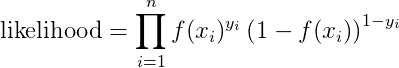

To make computation easier, we calculate log likelihood and try to maximize the log likehood.

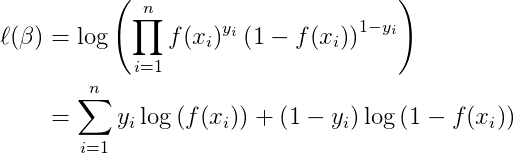

In [38]:
def log_likelihood(X, y, coeffs):
    f = predict_proba(X, coeffs)
    return sum(np.log(f[y==1]) + np.log(1-f[y==0]))

In [39]:
coeffs = np.random.random(X.shape[1])   #randomly generate two coefficients

In [40]:
X, y, coeffs

(array([[ -7.66054695e-01,   1.83324682e-01],
        [ -9.20383253e-01,  -7.23168038e-02],
        [ -9.86585088e-01,  -2.86920000e-01],
        [  1.70910242e+00,  -1.10453952e+00],
        [  1.98764670e+00,   1.77624479e+00],
        [  3.86274219e+00,   2.63325914e+00],
        [ -1.12836011e+00,  -4.22761581e-01],
        [ -1.10074198e+00,  -2.56042975e+00],
        [ -1.53716448e+00,   1.10502647e+00],
        [ -3.23726922e-01,   5.56269743e-01],
        [ -1.28532883e+00,  -1.30819171e+00],
        [  3.35973253e+00,  -1.79506345e+00],
        [ -1.27034986e+00,   1.26780440e+00],
        [ -7.10233633e-01,  -1.13058206e+00],
        [ -1.12933108e+00,   6.87661760e-01],
        [  2.48206729e-01,  -5.09792713e-01],
        [ -2.47263494e+00,  -4.86612462e-01],
        [ -1.11573423e+00,   1.43370121e+00],
        [ -1.21414740e+00,   1.97698901e+00],
        [ -1.25860859e+00,  -1.82896522e-01],
        [ -5.35834091e-01,   1.10698637e+00],
        [  9.23281451e-01,  -1.308

In [41]:
log_likelihood(X, y, coeffs)

-48.187505340255512

In [42]:
p = predict_proba(X, coeffs)
y_hat = predict(X, coeffs)
cost = log_likelihood(X, y, coeffs)
print("The predicted probability vector is {}".format(str(p)))
print("The predicted class vector is {}".format(str(y_hat)))
print("The cost function at these coefficients is {}".format(str(cost)))

The predicted probability vector is [ 0.39876641  0.3732293   0.36040419  0.70193109  0.77872728  0.91491351
  0.33980951  0.30325005  0.3184758   0.46692122  0.30420884  0.84760545
  0.35471886  0.37940328  0.36133517  0.52359808  0.19502213  0.37798551
  0.37605169  0.3282564   0.44933039  0.59911104  0.74909134  0.80078522
  0.57992568  0.16877024  0.56718851  0.53106398  0.34846048  0.4650309
  0.69441925  0.39096987  0.65932563  0.13152671  0.59077602  0.61351722
  0.41332371  0.79091911  0.60180829  0.56241996  0.31665517  0.69076473
  0.33946171  0.46372966  0.2080204   0.51369143  0.62088992  0.43243572
  0.54405825  0.20171504  0.39698032  0.47617872  0.61192526  0.36369096
  0.38977507  0.4010464   0.34672864  0.64609991  0.41376144  0.55285652
  0.52856318  0.42741258  0.39286382  0.68024382  0.59690626  0.4136217
  0.32900044  0.53251805  0.38502292  0.35215776  0.33298752  0.6475118
  0.80673422  0.397375    0.76137222  0.43142225  0.49672324  0.70921069
  0.44079961  0.38

### Gradient Descent/Ascent

We use gradient ascent to maximinze log likelihood in logistic regression. Here's what our gradient ascent algorithm will look like:

Gradient Ascent
    
    Initialize your beta coefficients (generally choose 0)
    
    Repeat until incremental increase in likelihood is sufficiently small:
    
        beta <- beta + alpha * gradient

alpha is a parameter in our algorithm, generally called the step size or learning rate.

#### Optimizig the learning rate

alpha cannot be too small or too large.

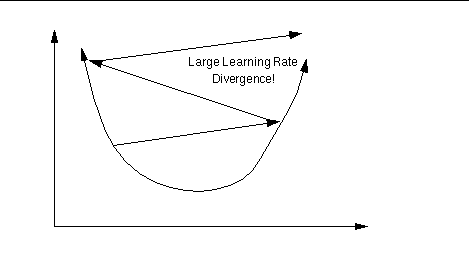

x-axis: coeficients (beta); y-axis:cost function.
Keep X and y are constant, we change coefficients to minimize cost function.

#### Gradient of the likelihood

First, we calculate the derivative of a sigmoid function.

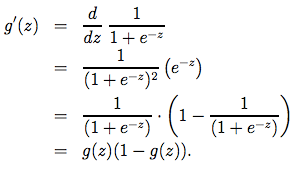

Then, we calculate the derivative of log likelihood function.

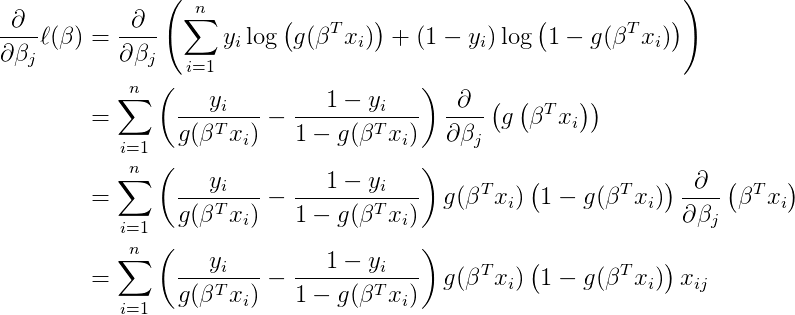

We can do some rearranging and simplifying.

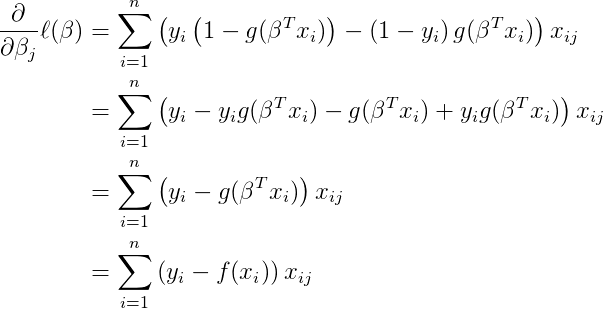

This is what we'll use to update the coefficients in each iteration of gradient descent.

In [50]:
def log_likelihood_gradient(X, y, coeffs):
    f = predict_proba(X, coeffs)
    return X.T.dot(y - f)

In [51]:
coeffs = np.random.random(X.shape[1])
print coeffs

[ 0.77705979  0.16742073]


In [52]:
p = predict_proba(X, coeffs)
y_hat = predict(X, coeffs)
cost = log_likelihood(X, y, coeffs)
gradient = log_likelihood_gradient(X, y, coeffs)
print("The predicted probability vector is \n{}".format(str(p)))
print("The predicted class vector is \n{}".format(str(y_hat)))
print("The cost function at these coefficients is \n{}".format(str(cost)))
print("The gradient of the cost is \n{}".format(str(gradient)))

The predicted probability vector is 
[ 0.36248887  0.32578747  0.30689582  0.75825787  0.86317332  0.969005
  0.2793713   0.21686817  0.26708469  0.46047661  0.22832459  0.90971682
  0.31542418  0.32274685  0.31811915  0.52685453  0.11890357  0.34819996
  0.35149456  0.26724711  0.44249491  0.62209173  0.81876237  0.88490927
  0.61561564  0.09597299  0.60614819  0.53951004  0.29868864  0.44052844
  0.77216416  0.34347216  0.70574888  0.06322499  0.61779453  0.64733129
  0.36620436  0.86447831  0.64463306  0.58670149  0.25907812  0.73938624
  0.26961052  0.44998195  0.11523779  0.53509214  0.63836166  0.40311321
  0.58610701  0.11937986  0.36835444  0.4721922   0.65156943  0.31840102
  0.36192882  0.37155144  0.29930895  0.68880204  0.40097779  0.55906763
  0.5389923   0.37234656  0.33956098  0.75971399  0.61553221  0.40094625
  0.26947787  0.54410161  0.34590607  0.30468106  0.27211944  0.69201996
  0.88751259  0.34915119  0.84682026  0.42630374  0.50419859  0.76911525
  0.43352236  0.

### Implement Gradient Ascent

In [102]:
coeffs = np.random.random(X.shape[1])

def GradientAscent(X, y, coeffs, alpha=0.1, num_iterations=1000):
    cost_history = [];
    for i in range(num_iterations):
        cost = log_likelihood(X, y, coeffs)    #cost function
        coeffs += alpha *  log_likelihood_gradient(X, y, coeffs)  #update coefficients
        cost_history.append(cost)              #append cost
    return coeffs, cost_history

### Run On Data

In [103]:
coeffs, cost_history = GradientAscent(X, y, coeffs, alpha = 0.01)

In [104]:
coeffs

array([ 2.70706753,  0.61488544])

In [105]:
num_iterations =1000
cost_history[:20]

[-47.853910674589216,
 -41.623892644782678,
 -38.299933953789811,
 -36.241180554099579,
 -34.843185515573779,
 -33.83406721817903,
 -33.073575756987246,
 -32.481910795832817,
 -32.010220065587923,
 -31.626860362923914,
 -31.310398191622507,
 -31.045780740404172,
 -30.822116531453027,
 -30.631326045434957,
 -30.467287675529978,
 -30.325278399456082,
 -30.201596545033834,
 -30.093300793696127,
 -29.99802552640741,
 -29.913847581272471]

We can see that the log likelihood is increasing with more iterations.

In [106]:
def plot_cost(cost_history, ax, alpha=1.0):
    """Plot the in sample cost of a gradient ascent run over time."""
    ax.plot(range(len(cost_history)), cost_history, alpha=alpha)
    ax.set_title("Logistic Regression Cost Function Over Time")
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Cost")

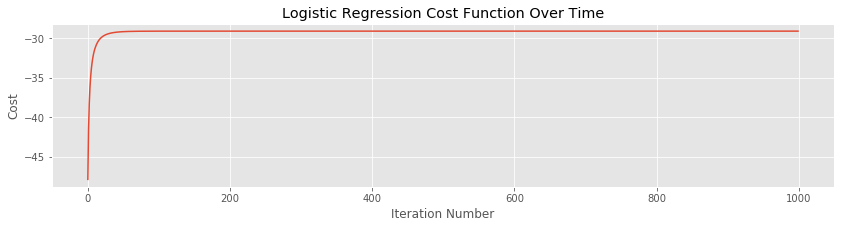

In [107]:
fig, ax = plt.subplots(1, figsize=(14, 3))

plot_cost(cost_history, ax)

We can see that the cost increases quickly first and then reach to a stable stage.

## Gradient Descent - implemented in OOP

#### Put together all the functions we have written

In [162]:
import numpy as np

def predict_proba(X, coeffs):
    '''
    INPUT: 2 dimensional numpy array, numpy array
    OUTPUT: numpy array

    Calculate the predicted percentages (floats between 0 and 1) for the given
    data with the given coefficients.
    '''
    z = np.dot(X, coeffs).flatten()                 
    return 1/(1+np.exp(-z))

def predict(X, coeffs, thres=0.5):
    '''
    INPUT: 2 dimensional numpy array, numpy array
    OUTPUT: numpy array

    Calculate the predicted values (0 or 1) for the given data with the given
    coefficients.
    '''
    g = predict_proba(X, coeffs)
    return (g > thres).astype(int)

def log_likelihood(X, y, coeffs):
    '''
    INPUT: 2 dimensional numpy array, numpy array, numpy array
    OUTPUT: float

    Calculate the log likelihood of the data with the given coefficients.
    '''
    f = predict_proba(X, coeffs)
    return sum(np.log(f[y==1]) + np.log(1-f[y==0]))

def log_likelihood_gradient(X, y, coeffs):
    '''
    INPUT: 2 dimensional numpy array, numpy array, numpy array
    OUTPUT: numpy array

    Calculate the gradient of the log likelihood at the given value for the
    coeffs. Return an array of the same size as the coeffs array.
    '''
    f = predict_proba(X, coeffs)
    return X.T.dot(y - f)

#### Write a Gradient Ascent class

It will use functions defined for logistic regression:

cost function

gradient

prediction function

In [163]:
import numpy as np

class GradientAscent(object):

    def __init__(self, cost, gradient, predict_func, fit_intercept=False):
        
        # Initialize coefficients in run method once you know how many features you have
        self.coeffs = None
        self.cost = cost
        self.gradient = gradient
        self.predict_func = predict_func
        self.fit_intercept = fit_intercept

    def run(self, X, y, alpha=0.1, num_iterations=1000):
        
        # Add intercept (if we initialized with fit_intercept)
        if self.fit_intercept:
            X = self.add_intercept(X)

        # Initialize coeffs to all zeros
        self.coeffs = np.zeros(X.shape[1])

        # Prepare to save the history of cost
        self.cost_history = []
        
        # Iteratively calculate the gradient and cost, and update coefficient
        for i in range(num_iterations):
            cost = self.cost(X, y, self.coeffs)
            self.coeffs += alpha * self.gradient(X, y, self.coeffs)
            self.cost_history.append(cost)
            
    def predict(self, X):
        '''
        INPUT: GradientAscent, 2 dimensional numpy array
        OUTPUT: numpy array (ints)

        Use the coeffs to compute the prediction for X. Return an array of 0's
        and 1's.
        '''
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        return self.predict_func(X,self.coeffs)

    def add_intercept(self, X):
        '''
        INPUT: 2 dimensional numpy array
        OUTPUT: 2 dimensional numpy array

        Return a new 2d array with a column of ones added as the first
        column of X.
        '''
        return np.hstack((np.ones((X.shape[0],1)),X))

In [164]:
#generate two GradientAscent class: ga & ga2
ga = GradientAscent(cost=log_likelihood, 
                    gradient=log_likelihood_gradient, 
                    predict_func=predict,
                    fit_intercept=False)

ga2 = GradientAscent(cost=log_likelihood, 
                    gradient=log_likelihood_gradient, 
                    predict_func=predict,
                    fit_intercept=False)

In [165]:
ga.run(X, y, alpha=0.1, num_iterations=1000)
ga2.run(X, y, alpha=0.001, num_iterations=1000)

In [166]:
y_pred = ga.predict(X)
coeffs = ga.coeffs
gradient = ga.gradient(X, y_pred, coeffs)
print("The predicted class vector is \n{}".format(str(y_pred)))
print("The actual class vector is \n{}".format(str(y)))

The predicted class vector is 
[0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0
 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0]
The actual class vector is 
[0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0]


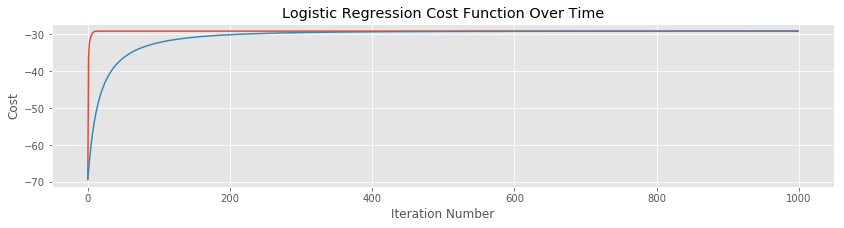

In [167]:
# plot cost_history with different learning rate
fig, ax = plt.subplots(1, figsize=(14, 3))

plot_cost(ga.cost_history, ax)
plot_cost(ga2.cost_history, ax)

We can see that the cost_history with bigger learning rate inceases more steeply (red line).

### Metrics

These metrics are used to measure performance of the classification model.

Maximize likelihood estimation is trying to increase accuracy most, but ignore other metrics.

In [178]:
def accuracy(y_true, y_pred):
    '''
    INPUT: numpy array, numpy array
    OUPUT: float

    Calculate the percent of predictions which equal the true values.
    '''
    return sum(y_pred == y_true)/float(y_true.shape[0])

def precision(y_true, y_pred):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: float

    Calculate the percent of positive predictions which were correct.
    '''
    return sum((y_pred == y_true)*(y_pred == 1))/float(sum(y_pred == 1))

def recall(y_true, y_pred):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: float

    Calculate the percent of positive cases which were correctly predicted.
    '''
    return sum((y_pred == y_true)*(y_pred ==1))/float(sum(y==1))

In [179]:
print("Accuracy of the Logistic Regression is: {}".format(accuracy(y, y_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y, y_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y, y_pred)))

Accuracy of the Logistic Regression is: 0.89
Precision of the Logistic Regression is: 0.953488372093
Recall of the Logistic Regression is: 0.82


### Visualize the Fitted Model

In [180]:
print("Estimated Logistic Coefficients: {}".format(str(ga.coeffs)))
print("Predicted Values on Training Data: {}".format(str(ga.predict(X)[:5])))

Estimated Logistic Coefficients: [ 2.70706753  0.61488544]
Predicted Values on Training Data: [0 0 0 1 1]


In [182]:
def plot_decision_boundary_no_intercept(X, coeffs, ax):
    """Plot the decision boundary from a logistic regression that does 
    not contain an intercept term.
    """
    x0_bounds, x1_bounds = compute_scatterplot_bounds(X)
    t = np.linspace(x0_bounds[0], x0_bounds[1], num=3)
    m = - coeffs[0] / coeffs[1]
    ax.plot(t, m*t, label="Logistic Regression Line")

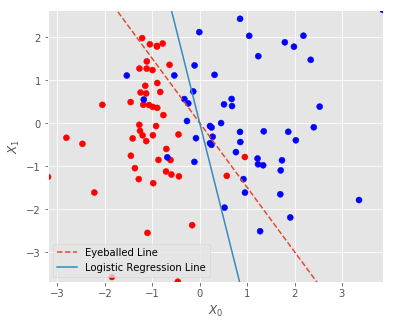

In [185]:
fig, ax = plt.subplots(1, figsize=(6, 5))

plot_classification_data(X, y, ax)
plot_eyeballed_line_no_intercept(X, ax)
plot_decision_boundary_no_intercept(X, ga.coeffs, ax)
ax.legend()
plt.show()

The points on the logistic regression line means there is 50% to classify as red, and 50% to classify as blue. (0.5 is the threshold)

### Compare with sklearn

sklearn has package that can do logistic regression automatically. Two points to pay attention.

The LogisticRegression model from sklearn includes regularization. We set the C parameter very large to turn it off.

It also includes an intercept by default, there is an option to turn this off.

In [187]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10**6, fit_intercept=False)
lr.fit(X, y)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [189]:
print("Gradient Descent Coefficients: {}".format(ga.coeffs))
print("LogisticRegression Coefficents: {}".format(lr.coef_))

Gradient Descent Coefficients: [ 2.70706753  0.61488544]
LogisticRegression Coefficents: [[ 2.70635687  0.61461823]]


We can see the optimal coefficients get from gradient descent and sklearn logistic regression model is very close.

Note: The algorithms used in these two approaches are not the same. We use gradient ascent, but sklearn uses a linear algebra library intended for fittign support vector machines.


### Add Intercept

In [190]:
ga_intercept = GradientAscent(cost=log_likelihood, 
                              gradient=log_likelihood_gradient, 
                              predict_func=predict,
                              fit_intercept=True)

In [191]:
ga_intercept.run(X, y, num_iterations=200)

In [192]:
y_pred = ga_intercept.predict(X)

print("The predicted class vector is \n{}".format(str(y_pred)))
print("The actual class vector is \n{}".format(str(y)))

The predicted class vector is 
[0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0
 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0]
The actual class vector is 
[0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0]


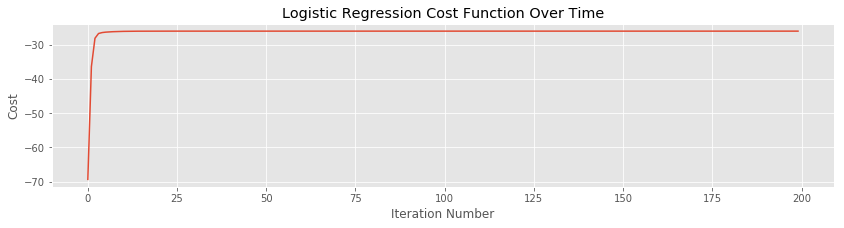

In [193]:
fig, ax = plt.subplots(1, figsize=(14, 3))

plot_cost(ga_intercept.cost_history, ax)

In [194]:
print("Estimated Logistic Coefficients: {}".format(str(ga_intercept.coeffs)))
print("Predicted Values on Training Data: {}".format(str(ga_intercept.predict(X)[:5])))

Estimated Logistic Coefficients: [ 0.99809371  3.35588318  0.70223695]
Predicted Values on Training Data: [0 0 0 1 1]


Notice that now we have three parameter estimates, the first is the intercept term.

In [195]:
def plot_decision_boundary(X, coeffs, ax, extra_label=''):
    """Plot the decision boundary from a logistic regression that
    includes an intercept as the first parameter.
    """
    x0_bounds, x1_bounds = compute_scatterplot_bounds(X)
    t = np.linspace(x0_bounds[0], x0_bounds[1], num=3)
    m = - coeffs[1] / coeffs[2]
    b = - coeffs[0] / coeffs[2]
    ax.plot(t, m * t + b, label="Logistic Regression Line {}".format(extra_label))
    set_scatterplot_bounds(x0_bounds, x1_bounds, ax)

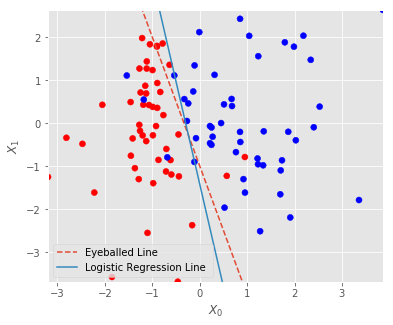

In [199]:
fig, ax = plt.subplots(1, figsize=(6, 5))

plot_classification_data(X, y, ax)
plot_eyeballed_line(X, ax)
plot_decision_boundary(X, ga_intercept.coeffs, ax)
ax.legend()
plt.show()

In [200]:
y_pred = ga_intercept.predict(X)

print("Accuracy of the Logistic Regression is: {}".format(accuracy(y, y_pred)))
print("Precision of the Logistic Regression is: {}".format(precision(y, y_pred)))
print("Recall of the Logistic Regression is: {}".format(recall(y, y_pred)))

Accuracy of the Logistic Regression is: 0.93
Precision of the Logistic Regression is: 0.957446808511
Recall of the Logistic Regression is: 0.9


We can see that by adding interception, the model performs better.

### Interpret the Coefficients

Increasing the value of $x_i$ by 1 increases the odds ratio by a factor of $e^{\beta_i}$

In [202]:
ga_intercept.coeffs

array([ 0.99809371,  3.35588318,  0.70223695])

In [203]:
def bar_plot_coeffs(coeffs, ax, extra_label=''):
    """Bar plot the coefficients from a logistic regression.
    """
    t = np.arange(coeffs.shape[0])
    xtick = [r"$\beta_{}$".format(i) for i in t]
    ax.bar(t, coeffs, align="center")
    ax.set_title("Coefficients of Logistic Regression")
    ax.set_xticks(t)
    ax.set_xticklabels(xtick)

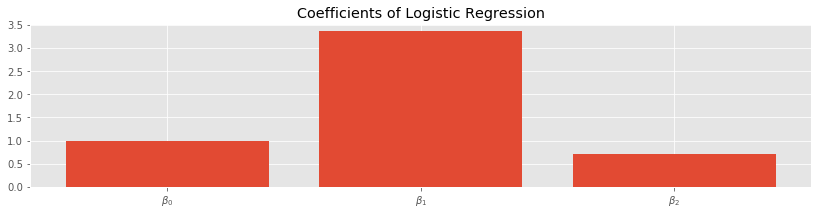

In [204]:
fig, ax = plt.subplots(1, figsize=(14, 3))
bar_plot_coeffs(ga_intercept.coeffs, ax)